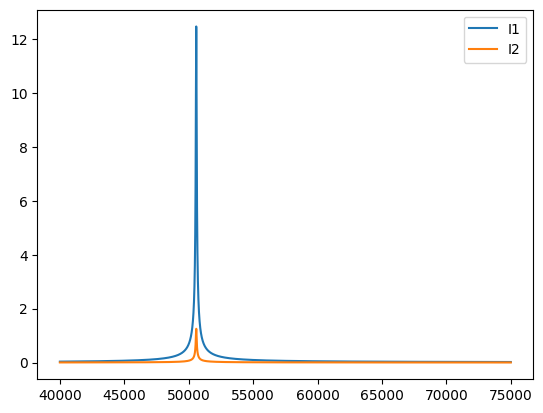

50582.78558278558
Frequencia de ressonancia:  (50329.21210448704+0j)


In [23]:
import numpy as np
from cmath import *
from numpy import linalg
import matplotlib.pyplot as plt


# R1, R2, Rc => Resistências das bobinas primárias e secundárias
# L1 = L2 = L => A indutância das bobinas é igual
# M = L, pois M = sqrt(L^2)
# C1 = C2 = C => A capacitância dos capacitores é igual
def CalcularTransformador_projeto(Uf, R1, R2, Rc, L, C, k, f):
    w = 2*pi*f
    XL = 1j*w*L
    XC = 1/(1j*w*C)
    M = k*L
    XM = 1j*w*M
    Z=np.array([[R1+XL+XC, -XM],[-XM, XL+R2+((Rc*XC)/(Rc+XC))]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

lista_freq = np.linspace(40000, 75e3, 1000000)
maior_valor = 0
lista_i1 = []
lista_i2 = []
for freq in lista_freq:
    I1, I2 = CalcularTransformador_projeto(50, 1, 1, 300, 10e-3, 1e-9, 0.1, freq)
    lista_i1.append(abs(I1))
    lista_i2.append(abs(I2))

# plotar duas curvas no mesmo grafico de i1 e i2 por freq
plt.plot(lista_freq, lista_i1, label="I1")
plt.plot(lista_freq, lista_i2, label="I2")
plt.legend()
plt.show()
print(lista_freq[lista_i1.index(max(lista_i1))])
# Calculo da frequencia de ressonancia
freq_r = 1/(2*pi*sqrt(10e-3*1e-9))
print("Frequencia de ressonancia: ", freq_r)